# HW3 - Linear Regression Implementation
## 2022104346 정지헌

import required modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Callable

## Dataset for regression (x, y) 

In [2]:
x_data = np.array([6.98611719, 7.08652311, 6.74622818, 9.85510384, 8.65613608,
       9.70686076, 0.9041283 , 8.56129512, 6.45751913, 2.92780884,
       2.3686715 , 7.18396999, 9.80689276, 1.9496682 , 8.46351758,
       7.0409356 , 0.16149699, 0.86754713, 4.06291011, 5.45422785,
       3.83514853, 6.91357578, 5.13557359, 1.55509544, 9.41429363,
       7.91246976, 3.93277332, 9.57093045, 2.48931372, 6.90901994,
       4.65221765, 9.53439831, 0.11791453, 5.65241465, 8.19063104,
       1.76035839, 8.2149095 , 3.91041031, 7.42737493, 1.4108902 ,
       6.5297066 , 7.0416219 , 3.31821157, 9.68239836, 1.64428566,
       2.10264966, 3.38300776, 0.10437871, 0.98067075, 7.30390111,
       4.4478519 , 3.64092801, 2.59045826, 6.02944917, 3.29667587,
       1.87389173, 3.33258333, 3.32481584, 0.68832432, 0.93663196,
       9.6868761 , 9.27857591, 1.41665817, 8.3585017 , 9.84944875,
       3.34744571, 9.77327152, 6.17301398, 9.89738009, 7.9749277 ,
       1.03531963, 5.65058949, 7.84997506, 3.94305581, 9.02790423,
       5.7524261 , 5.26330879, 7.77916259, 8.65558708, 2.069904  ,
       0.67958461, 6.95164049, 2.47868244, 6.97662364, 4.66442799,
       9.01990406, 3.2447557 , 2.85226178, 2.16039039, 7.02293479,
       9.31442824, 3.91681803, 5.10064847, 8.92126984, 5.83303593,
       0.15487141, 9.96043756, 1.89769557, 9.28669795, 1.71881133])
y_data = np.array([ 1.03847265e+01,  9.90935153e+00,  9.92252638e+00,  1.53037103e+01,
        1.18804300e+01,  1.52506994e+01, -3.13014023e+00,  1.27750464e+01,
        8.10188445e+00,  3.47838906e-01,  9.57832257e-01,  1.05276747e+01,
        1.50367217e+01, -1.33397204e+00,  1.02464626e+01,  1.05844272e+01,
       -3.59155425e+00, -2.38695926e+00,  3.31128414e+00,  5.01680129e+00,
        2.67842119e+00,  9.15056925e+00,  3.61738727e+00, -1.00035387e+00,
        1.36751696e+01,  1.14332790e+01,  3.53966745e+00,  1.43495524e+01,
        5.18589630e-01,  8.87570411e+00,  2.84365337e+00,  1.41133609e+01,
       -3.21437689e+00,  6.62217332e+00,  1.07545144e+01, -1.26244873e+00,
        1.21560755e+01,  1.73670549e+00,  9.04845025e+00, -4.91268146e+00,
        6.06007799e+00,  9.22177278e+00,  2.43242531e+00,  1.60391941e+01,
       -2.79269178e-01, -3.02717199e+00,  5.88048697e-01, -5.12901957e+00,
       -4.25334814e+00,  8.33999653e+00,  4.37670422e+00,  3.78246956e+00,
        1.55308933e-01,  8.35604304e+00,  8.07300526e-01, -9.70701618e-01,
        1.38657875e+00,  2.42238207e+00, -2.89378330e+00, -1.94459332e+00,
        1.63384803e+01,  1.43018847e+01, -2.36816953e+00,  1.36315161e+01,
        1.46121945e+01,  3.09118145e+00,  1.39898079e+01,  7.09442078e+00,
        1.48475170e+01,  8.52689832e+00, -9.36080890e-01,  6.77888560e+00,
        1.07129911e+01,  2.69378204e+00,  1.26397683e+01,  4.83502671e+00,
        6.05254603e+00,  1.03324691e+01,  1.17120719e+01, -8.83822899e-01,
       -2.37745171e+00,  8.47827905e+00,  9.04675109e-04,  6.66778948e+00,
        4.22381070e+00,  1.23344378e+01, -1.45636091e-01,  7.69682910e-01,
       -5.16006546e-01,  9.67747306e+00,  1.45575766e+01,  2.81060475e+00,
        4.91888285e+00,  1.31718910e+01,  7.38832928e+00, -3.04281756e+00,
        1.44364204e+01, -1.77250525e+00,  1.39864850e+01, -4.48927214e-01])

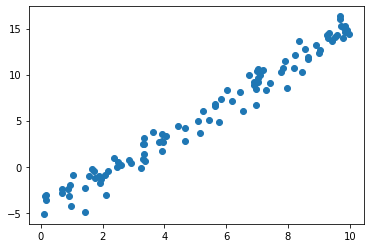

In [3]:
plt.plot(x_data, y_data, 'o')

### Cost Function의 정의

\begin{equation}
g(w) = \frac{1}{P} \sum_{p = 1}^{P} {\left( {\begin{pmatrix} 1 \\ x_p \end{pmatrix}}^{\intercal} \begin{pmatrix} w_0 \\ w_1 \end{pmatrix} - y_p \right)}^2
\end{equation}

\begin{equation}
\nabla g(w) = \frac{2}{P} \sum_{p = 1}^{P} \begin{pmatrix} 1 \\ x_p \end{pmatrix} \left( {\begin{pmatrix} 1 \\ x_p \end{pmatrix}}^{\intercal} \begin{pmatrix} w_0 \\ w_1 \end{pmatrix} - y_p \right)
\end{equation} 

In [4]:
class CostFunction(Callable):
    def __init__(self):
        self.grad = None

    def __call__(self, x: np.ndarray, w: np.ndarray, y: np.ndarray):
        # x dimensions: (P, N)
        # w dimensions: (N,)
        # y dimensions: (P,)

        mat_x = np.transpose(x[:, :, np.newaxis], (-3, -1, -2))
        # (P, N) -> (P, N, 1) -> (P, 1, N)
        mat_w = w[:, np.newaxis]
        # (N,) -> (N, 1)
        mat_y = y[:, np.newaxis, np.newaxis]
        
        mat_deviation = np.matmul(mat_x, mat_w) - mat_y
        # x transpose -> (P, 1, N)
        # matmul (P, 1, N), (N, 1) -> (P, 1, 1)
        deviation = np.squeeze(mat_deviation)
        # squeeze (P, 1, 1) -> (P,)

        self.grad = np.sum(x * deviation[:, np.newaxis], axis = 0) * 2 / x.shape[0]
        # (P, N) * (P, 1) -> (P, N)
        # sum((P, N), axis = 0) -> (N,) 

        return np.sum(np.square(deviation)) / x.shape[0]
        

### Gradient Descent를 이용하여 최적의 weight vector $\begin{pmatrix} w_0 \\ w_1 \end{pmatrix}$를 구하기

In [5]:
class gradientDescent:
    def __init__(self, init_w: np.ndarray, cost: CostFunction, x_data: np.ndarray, y_data: np.ndarray):
        self.g = cost
        self.w = np.copy(init_w)
        self.g_history = []
        self.w_history = []

        self.min_g = None
        self.argmin_g = None

        self.x_raw = x_data
        self.y_raw = y_data

    def run(self, learning_rate: float, num_iterations: int):
        x = np.array([[1, i] for i in self.x_raw])
        y = np.array(self.y_raw)

        self.g_history.append(self.g(x, self.w, y))
        self.w_history.append(np.copy(self.w))

        for _ in range(num_iterations):
            grad = self.g.grad
            
            self.w -= grad * learning_rate

            self.g_history.append(self.g(x, self.w, y))
            self.w_history.append(np.copy(self.w))

        self.argmin_g = np.argmin(np.array(self.g_history))
        self.min_g = self.g_history[self.argmin_g]
        
        return self.w_history[self.argmin_g]

    def plot_results(self):
        _, axes = plt.subplots(3, 1, figsize = (18, 54))
        plt.Axes.set_title(axes[1], "Cost History")
        plt.Axes.set_xlabel(axes[1], "steps")
        plt.Axes.set_ylabel(axes[1], "g(w)")
        plt.Axes.plot(axes[1], np.arange(len(self.g_history)), self.g_history)

        plt.Axes.set_title(axes[2], "W Values History")
        plt.Axes.set_xlabel(axes[2], "$w_0$")
        plt.Axes.set_ylabel(axes[2], "$w_1$")
        plt.Axes.scatter(axes[2], [w[0] for w in self.w_history], [w[1] for w in self.w_history], c = np.linspace(0, 1, len(self.w_history)), cmap = "rainbow")

        x_base = np.arange(min(self.x_raw), max(self.x_raw), 0.1)
        plt.Axes.set_title(axes[0], "Real Data vs Regression Line")
        plt.Axes.set_xlabel(axes[0], "x")
        plt.Axes.set_ylabel(axes[0], "y")
        plt.Axes.plot(axes[0], self.x_raw, self.y_raw, 'o')
        plt.Axes.plot(axes[0], x_base, self.w_history[self.argmin_g][1] * x_base + self.w_history[self.argmin_g][0])

In [6]:

init_w = np.random.randn(2)

input_g = CostFunction()
optimizer = gradientDescent(init_w, input_g, x_data, y_data)

In [8]:
optimizer.run(1e-3, 7000)

array([-4.62398071,  1.95689282])

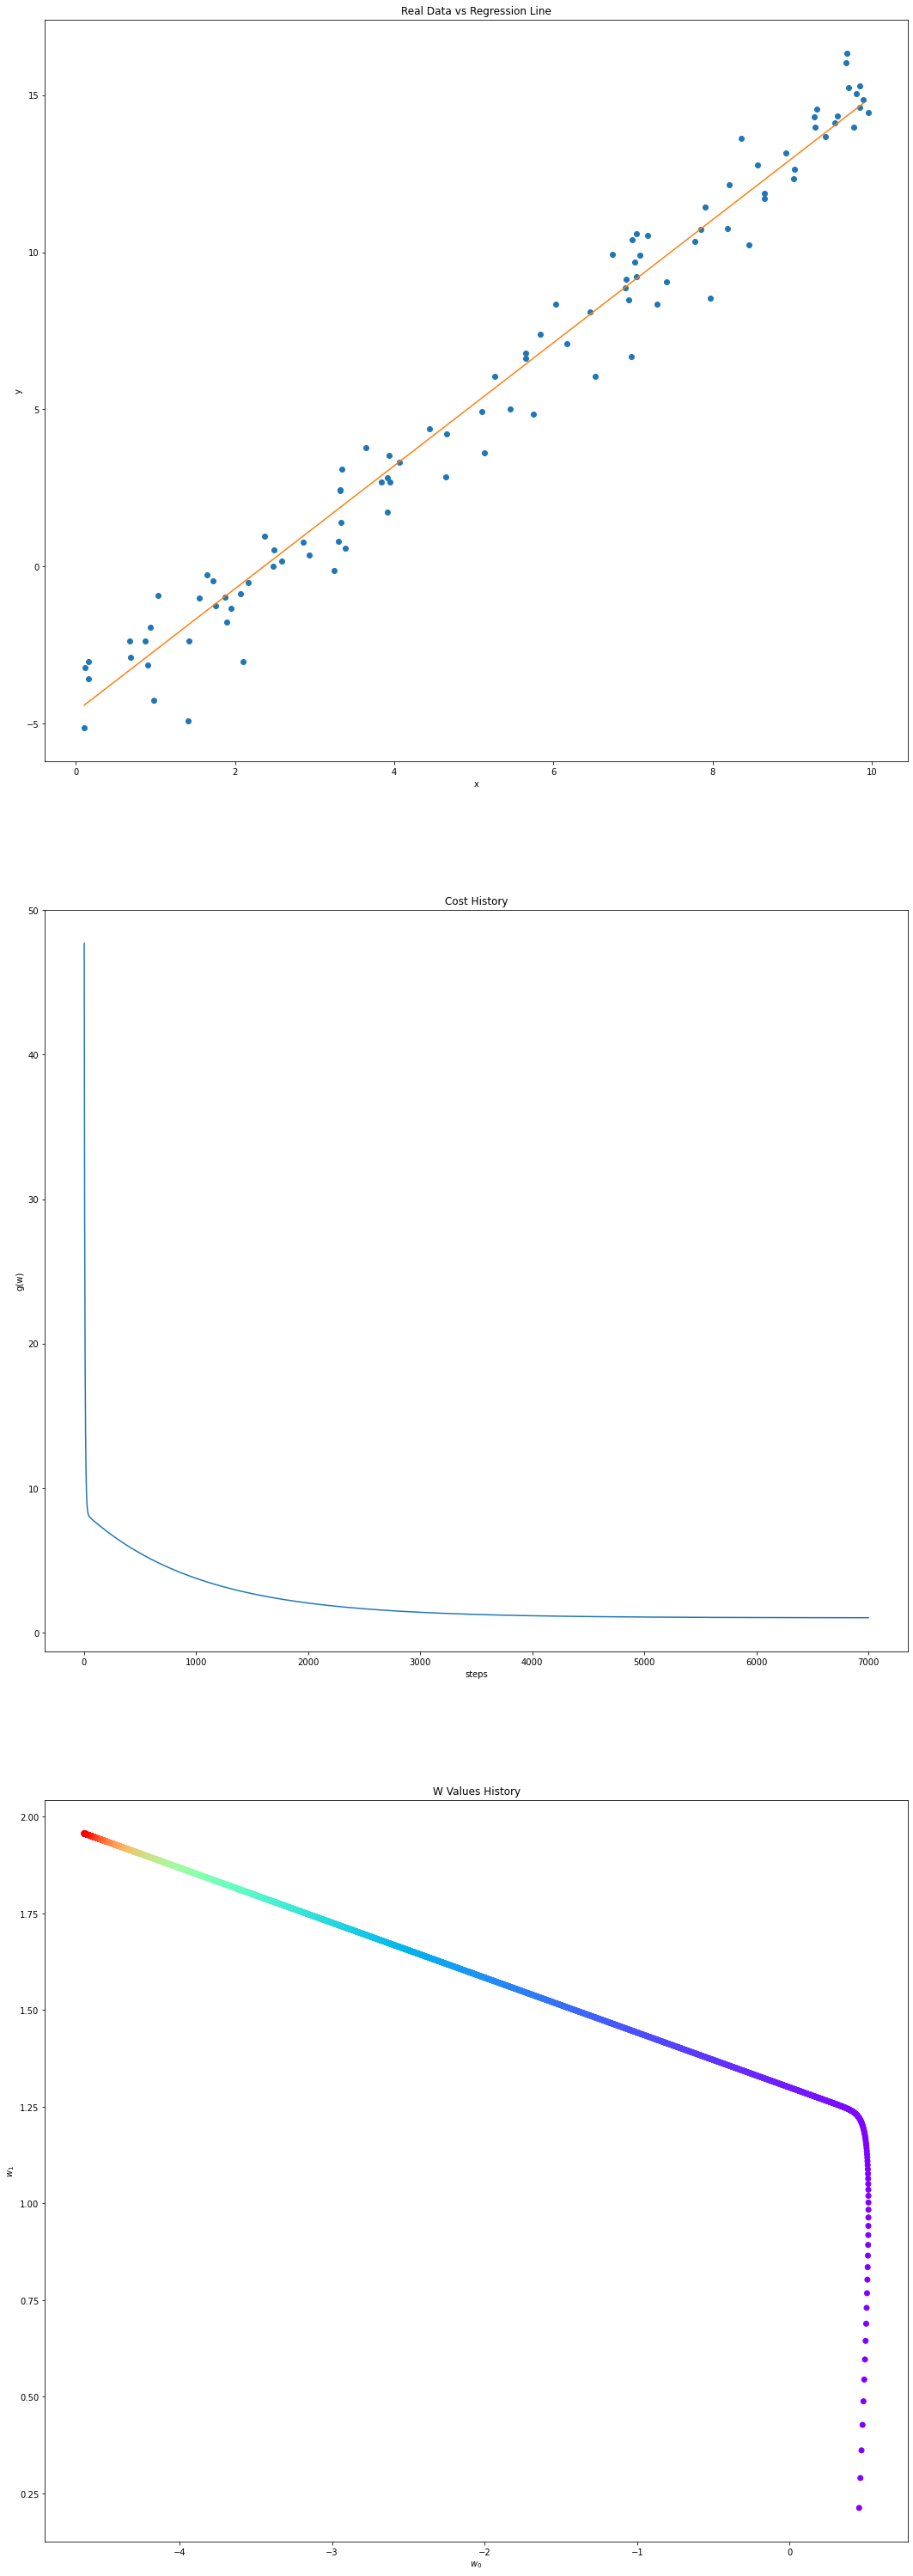

In [9]:
optimizer.plot_results()